### Twitter Data Extraction & Sentiment

In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import snscrape.modules.twitter as sntwitter
import itertools
import seaborn as sns

In [6]:
from twython import Twython

CONSUMER_KEY = "0pJRCT1emkOcrtxHl7lMN4N5A"
               
CONSUMER_SECRET = "IS4Gxcx1aQ1c5Hyei5PSePLS37IcVmYBT8Qt1t4IOxmLIxJD42"

twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

In [7]:
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_error_message',
 '_last_call',
 '_request',
 'access_token',
 'access_token_url',
 'add_list_member',
 'api_url',
 'api_version',
 'app_key',
 'app_secret',
 'authenticate_url',
 'client',
 'client_args',
 'construct_api_url',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_list_members',
 'create_metadata',
 'create_mute',
 'create_place',
 'create_saved_search',
 'cursor',
 'delete',
 'delete_list',
 'delete_list_member',
 'delete_list_members',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_mute',
 'destroy_saved_search',
 'de

In [9]:
sonuc=twitter.search(q='Deprem',lang='tr',count=100)

In [10]:
sonuc

{'statuses': [{'created_at': 'Sun Mar 12 17:38:05 +0000 2023',
   'id': 1634972040523575296,
   'id_str': '1634972040523575296',
   'text': "RT @ayyildirim1: Cumhurbaşkanımız Sayın Recep Tayyip Erdoğan ve Liderimiz Sayın Devlet BAHÇELİ, deprem bölgesi Hatay Samandağ'da çadır kent…",
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'ayyildirim1',
      'name': 'Ahmet Yiğit Yıldırım',
      'id': 194915782,
      'id_str': '194915782',
      'indices': [3, 15]}],
    'urls': []},
   'metadata': {'result_type': 'recent', 'iso_language_code': 'tr'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1911339630,
    'id_str': '1911339630',
    'name': 'Mesut BOĞATEMUR',
    'screen_name': 

In [11]:
items=sonuc['statuses']

In [13]:
tdf=pd.DataFrame(items)
tdf.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,Sun Mar 12 17:38:05 +0000 2023,1634972040523575296,1634972040523575296,RT @ayyildirim1: Cumhurbaşkanımız Sayın Recep ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,118,0,False,False,tr,NaN,NaN,NaN,NaN
1,Sun Mar 12 17:38:05 +0000 2023,1634972040066371591,1634972040066371591,RT @dort4luksehir: Bir şehir kaç kamyona sığar...,False,"{'hashtags': [{'text': 'Malatya', 'indices': [...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,76,0,False,False,tr,"{'media': [{'id': 1634869325474541569, 'id_str...",False,NaN,NaN
2,Sun Mar 12 17:38:05 +0000 2023,1634972040011874308,1634972040011874308,"RT @BekarEviTD: Kahramanmaraş merkezli, 11 ili...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,96,0,False,False,tr,NaN,NaN,NaN,NaN
3,Sun Mar 12 17:38:05 +0000 2023,1634972039378513920,1634972039378513920,RT @YavuzSelimTunc9: İBB'nin deprem yatırımı a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,1251,0,False,False,tr,NaN,NaN,NaN,NaN
4,Sun Mar 12 17:38:04 +0000 2023,1634972036421537792,1634972036421537792,RT @MoonkhanAksoy: #OylarTazminata\nHulusi AKA...,False,"{'hashtags': [{'text': 'OylarTazminata', 'indi...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,True,427,0,False,False,tr,NaN,NaN,1.634622e+18,1634622229953536007


In [15]:
user=pd.DataFrame(d['user'] for d in sonuc['statuses'])
user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,1911339630,1911339630,Mesut BOĞATEMUR,mesutbogatemur,,| Ülkü Ocakları Bingöl İl Başkanı |🇹🇷,https://t.co/M84S6txx4J,{'url': {'urls': [{'url': 'https://t.co/M84S6t...,False,4767,...,333333,True,False,False,False,None,None,None,none,[]
1,1514331164470878216,1514331164470878216,Metropol Babaannesi🌸,gozumtoprakda,,"Ve yıllar sonra torunlarım, vefât etmiş babaan...",None,{'description': {'urls': []}},False,1515,...,333333,True,False,True,False,None,None,None,none,[]
2,1291450856940937223,1291450856940937223,ÜNİ-BEÇ,unibec1910,,Bekar Evi Çocukları 1910 Ankaragücü Taraftarla...,None,{'description': {'urls': []}},False,398,...,333333,True,True,True,False,None,None,None,none,[]
3,1181633706395652097,1181633706395652097,ayhan,ayhan95950660,,Gündem Süper Lig,None,{'description': {'urls': []}},False,129,...,333333,True,False,True,False,None,None,None,none,[]
4,345840543,345840543,ramazan arı,ramazanariiiii,Türkiye ısparta,,None,{'description': {'urls': []}},False,564,...,333333,True,False,True,False,None,None,None,none,[]


In [16]:
df=tdf.merge(user,left_index=True,right_index=True)

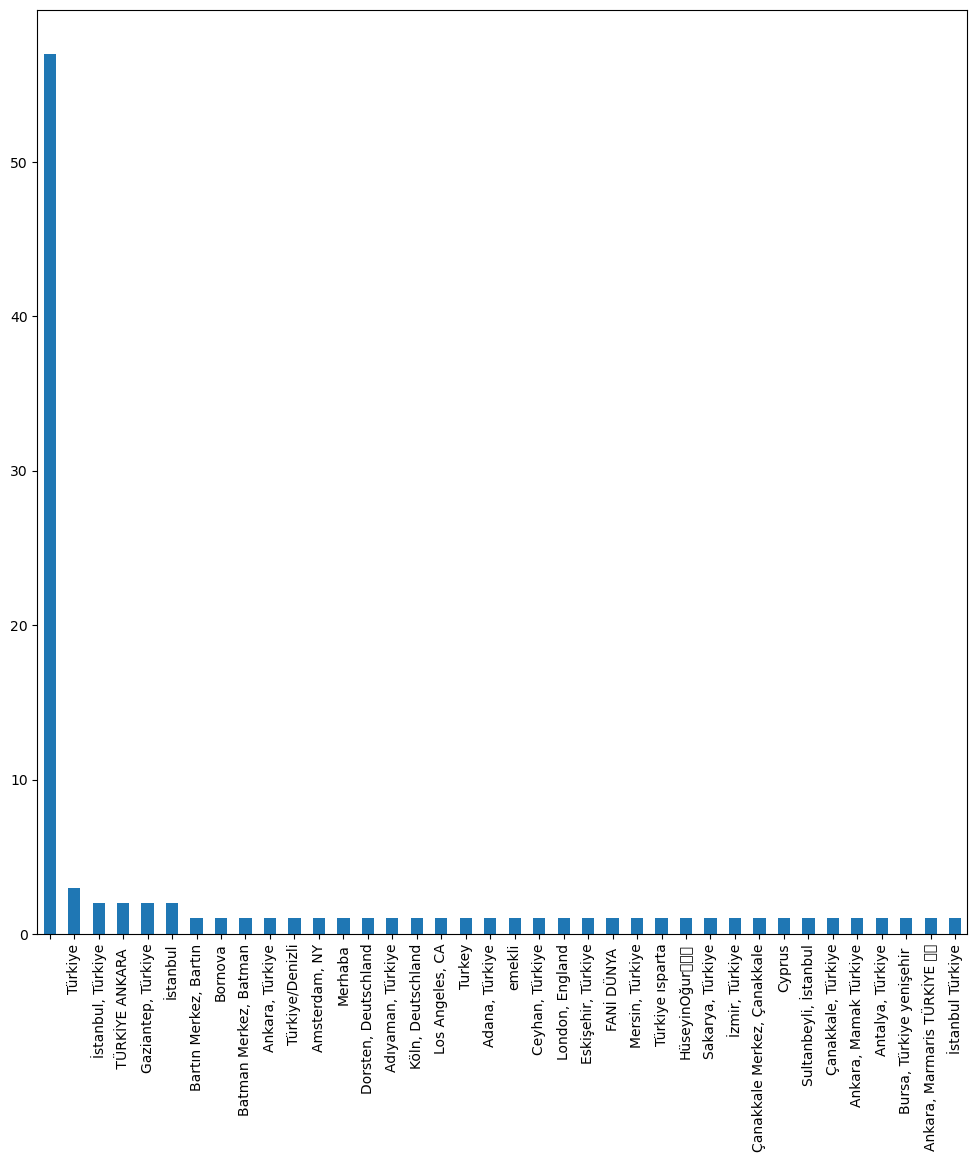

In [17]:
df.location.value_counts().plot(kind='bar',figsize=(12,12));

In [18]:
df.head()

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,Sun Mar 12 17:38:05 +0000 2023,1634972040523575296,1634972040523575296,RT @ayyildirim1: Cumhurbaşkanımız Sayın Recep ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,False,False,False,None,None,None,none,[]
1,Sun Mar 12 17:38:05 +0000 2023,1634972040066371591,1634972040066371591,RT @dort4luksehir: Bir şehir kaç kamyona sığar...,False,"{'hashtags': [{'text': 'Malatya', 'indices': [...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,False,True,False,None,None,None,none,[]
2,Sun Mar 12 17:38:05 +0000 2023,1634972040011874308,1634972040011874308,"RT @BekarEviTD: Kahramanmaraş merkezli, 11 ili...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
3,Sun Mar 12 17:38:05 +0000 2023,1634972039378513920,1634972039378513920,RT @YavuzSelimTunc9: İBB'nin deprem yatırımı a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,333333,True,False,True,False,None,None,None,none,[]
4,Sun Mar 12 17:38:04 +0000 2023,1634972036421537792,1634972036421537792,RT @MoonkhanAksoy: #OylarTazminata\nHulusi AKA...,False,"{'hashtags': [{'text': 'OylarTazminata', 'indi...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,False,True,False,None,None,None,none,[]


In [19]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','')
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','')
df['text']=df['text'].str.replace('\r','')

In [20]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
df['sentiment']=df['text'].apply(detect_sentiment)
df.sentiment.value_counts()

0.00    98
0.15     2
Name: sentiment, dtype: int64

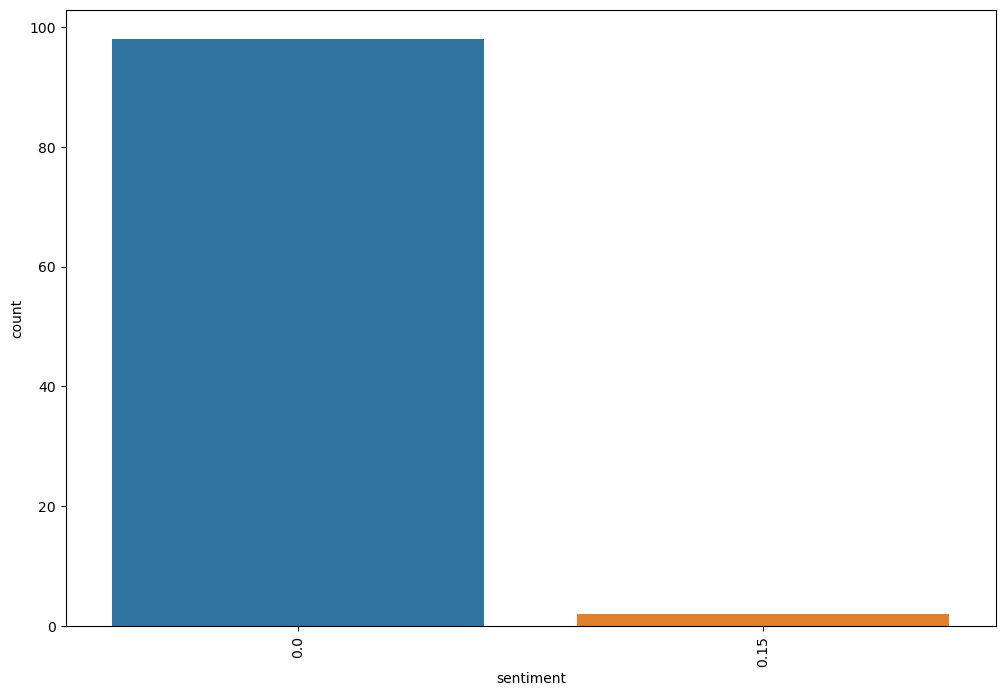

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(x=df["sentiment"])
plt.xticks(rotation=90);

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [27]:
# 0 notr, 1 pozitif, 2 negatif
def sntmnt(score):
    if score>0.2:
        return 1 
    elif score<-0.2:
        return 2
    else:
        return 0

In [28]:
df['class']=df['sentiment'].apply(sntmnt)

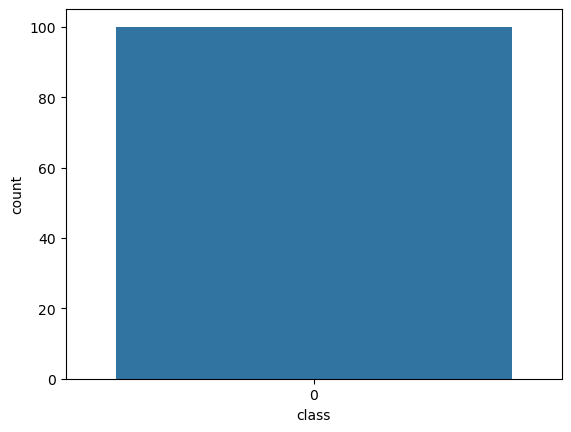

In [29]:
sns.countplot(x=df['class']);

In [31]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [32]:
x=df['text']
y=df['class']

In [33]:
x=vect.fit_transform(x)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.20)

In [38]:
model=d.fit(x_train,y_train)
tahmin=model.predict(x_test)
accuracy_score(tahmin,y_test)

1.0